In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

# LOAD DATA

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,sex,age,parch,fare,class,deck,embark_town,alive,alone
0,male,22.0,0,7.2500,Third,NaN,Southampton,no,False
1,female,38.0,0,71.2833,First,C,Cherbourg,yes,False
2,female,26.0,0,7.9250,Third,NaN,Southampton,yes,True
3,female,35.0,0,53.1000,First,C,Southampton,yes,False
4,male,35.0,0,8.0500,Third,NaN,Southampton,no,True


# EDA

In [3]:
df.info()
# lihat missing value
# lihat dtype nya

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          891 non-null    object 
 1   age          714 non-null    float64
 2   parch        891 non-null    int64  
 3   fare         891 non-null    float64
 4   class        891 non-null    object 
 5   deck         203 non-null    object 
 6   embark_town  889 non-null    object 
 7   alive        891 non-null    object 
 8   alone        891 non-null    bool   
dtypes: bool(1), float64(2), int64(1), object(5)
memory usage: 56.7+ KB


In [4]:
df.describe(include='all')
# perhatikan mean median min max unique dll

,sex,age,parch,fare,class,deck,embark_town,alive,alone
count,891,714.000000,891.000000,891.000000,891,203,889,891,891
unique,2,NaN,NaN,NaN,3,7,3,2,2
top,male,NaN,NaN,NaN,Third,C,Southampton,no,True
freq,577,NaN,NaN,NaN,491,59,644,549,537
mean,NaN,29.699118,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN
std,NaN,14.526497,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN
min,NaN,0.420000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,20.125000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN
50%,NaN,28.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN
75%,NaN,38.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN


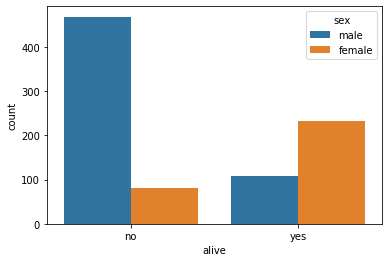

In [5]:
sns.countplot(x='alive',data=df,hue='sex')
# jumlah male lebih banyak
# tapi rasio yg selamat lebih baik pada female

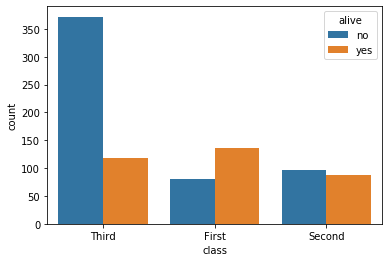

In [6]:
sns.countplot(x='class',data=df,hue='alive')
# penumpang third class paling banyak
# korban paling banyak juga dari third class
# rasio penumpang selamat pada first class lebih banyak daripada yg mati

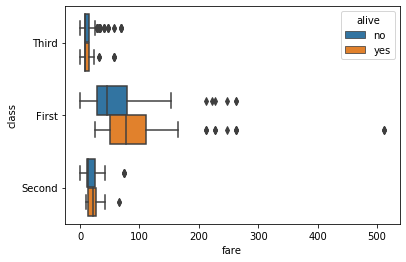

In [7]:
sns.boxplot(x='fare', y='class', hue='alive', data=df)

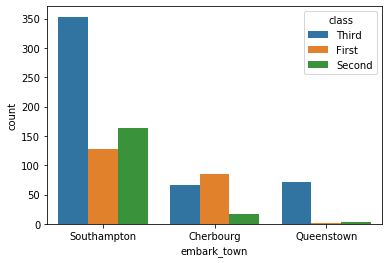

In [8]:
sns.countplot(x=df['embark_town'], data=df, hue='class')
# kebanyakan enumpang dari southampton, mungkin kota maju 
# paling dikit dari queenstown

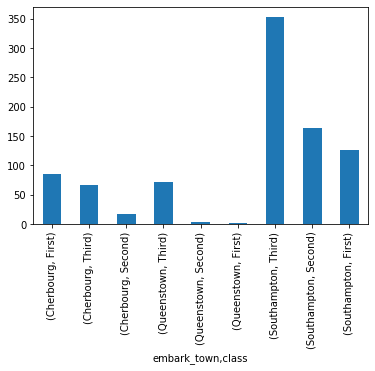

In [9]:
df.groupby('embark_town')['class'].value_counts().plot(kind='bar')

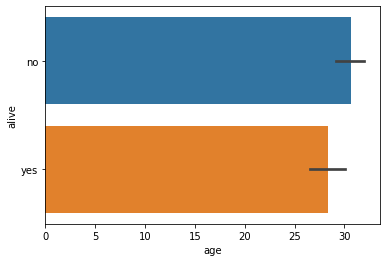

In [10]:
sns.barplot(x='age', y='alive', data=df)
# rata-rata yg hidup berumur lebih muda sedikit dari yg mati 

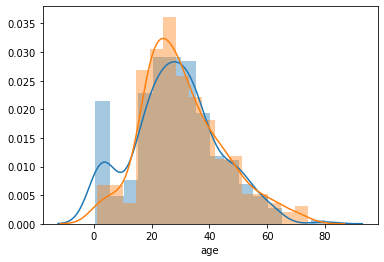

In [11]:
sns.distplot(df[df['alive']=='yes']['age']) # biru
sns.distplot(df[df['alive']=='no']['age']) # merah

# ada lonjakan jumlah selamat pada penumpang berusia anak2, 
# pada yg lanjut usia, ada sedikit kenaikan jumlah yg tidak selamat

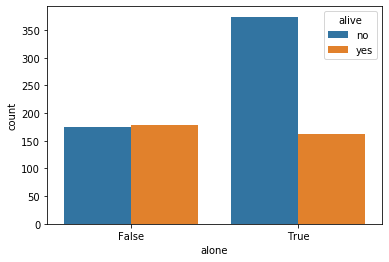

In [12]:
sns.countplot(x='alone', data=df, hue='alive')
# ketika alone(sendiri), ratio untuk selamat lebih rendah

Saran: 

Untuk orang yg naik titanic, jika ada kecelakaan, kemungkinan untuk selamat lebih besar jika anda wanita, muda, membayar mahal pada first class.

Selain EDA ini, bisa juga cek korelasi(terutama jika kasusnya regresi)

# Preprocessing

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          891 non-null    object 
 1   age          714 non-null    float64
 2   parch        891 non-null    int64  
 3   fare         891 non-null    float64
 4   class        891 non-null    object 
 5   deck         203 non-null    object 
 6   embark_town  889 non-null    object 
 7   alive        891 non-null    object 
 8   alone        891 non-null    bool   
dtypes: bool(1), float64(2), int64(1), object(5)
memory usage: 56.7+ KB


In [14]:
df.isna().sum()/df.shape[0] # persentase missing value

sex            0.000000
age            0.198653
parch          0.000000
fare           0.000000
class          0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

Tahap Preprocessing:
- drop yg banyak missing value (deck)
- isi missing value (age, embark_town)
- ubah data type alone jadi string 
- encoding (ubah categorical jadi numerical): sex, class, embark_town, alone
- ubah data type target (alive) jadi numerical
- putuskan jenis encoding untuk tiap feature:
>- onehot: nominal dan ordinal, unique value categorynya dikit 
>- ordinal: ordinal, category jadi angka sesuai urutan yg kita tentukan
>- binary:  mengubah value jadi binary, jumlah column menyesuaikan digit binary

>- sex: onehot/binary
>- class: onehot/ordinal
>- embark_town: isi missing value (most_freq), lalu onehot/binary
>- alone: onehot/binary
>- age: isi missing value (median)

- kalau mau/perlu, bisa scaling (terutama KNN/Logreg)

In [15]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

In [16]:
df = pd.read_csv('titanic.csv')

In [17]:
df = df.drop(columns='deck')

In [18]:
df['alone'] = df['alone'].astype(str)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          891 non-null    object 
 1   age          714 non-null    float64
 2   parch        891 non-null    int64  
 3   fare         891 non-null    float64
 4   class        891 non-null    object 
 5   embark_town  889 non-null    object 
 6   alive        891 non-null    object 
 7   alone        891 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 55.8+ KB


In [20]:
# Encoding
onehot_fill = Pipeline([
    ('fillna', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(drop='first'))
])

transformer = ColumnTransformer([
    ('one_hot', OneHotEncoder(drop='first'), ['sex','class','alone']),
    ('onehot_fill', onehot_fill, ['embark_town']),
    ('fill age', SimpleImputer(strategy='mean'), ['age'])
], remainder='passthrough')

# Splitting data

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# define X dan y
X = df.drop(columns=['alive'])
y = [1 if i=='yes' else 0 for i in df['alive']]

In [23]:
# split
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.2,
    stratify=y,
    random_state=2020
) 

# Select Benchmark

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [25]:
models = [
    ['Log Regression', LogisticRegression()],
    ['KNN', KNeighborsClassifier()],
    ['Decision Tree', DecisionTreeClassifier()],
    ['Random Forest', RandomForestClassifier()]
]

In [26]:
def evaluate(models):
    model_name=[]
    f1_score=[]
    f1_std=[]

    for name, model in models:
        estimator = Pipeline([
            ('preprocess',transformer),
            ('model', model)
        ])

        skfold = StratifiedKFold(n_splits=5)

        model_name.append(name)
        f1_score.append(cross_val_score(
            estimator, 
            X_train,y_train,
            cv=skfold,
            scoring='f1').mean()
            )

        f1_std.append(cross_val_score(
            estimator, 
            X_train,y_train,
            cv=skfold,
            scoring='f1').std()
            )

    return pd.DataFrame({
        'model': model_name,
        'f1_score': f1_score,
        'f1_std': f1_std
    })

In [27]:
evaluate(models)

,model,f1_score,f1_std
0,Log Regression,0.722298,0.060493
1,KNN,0.566397,0.067712
2,Decision Tree,0.712406,0.033544
3,Random Forest,0.730466,0.053110


Model terpilih: 
Random Forest, score tertinggi, std relatif rendah

In [28]:
# preproces dan model terpilih
estimator = Pipeline([
    ('preprocess',transformer),
    ('model', RandomForestClassifier())
])

# fit
estimator.fit(X_train, y_train)

# f1_score (y_test, y_predict)
f1_score(y_test, estimator.predict(X_test))

0.7200000000000001

# Hyperparameter Tuning

In [29]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [30]:
hyperparam_space = {
        # 'model__n_estimators' : [50, 75, 100, 150],
        'model__min_samples_leaf' : [1,5,10,15,20,50],
        'model__min_samples_split' : [2,5,10,15,20,50],
        'model__max_depth' : [2,3,4,5,6,7],
        'model__criterion' : ['entropy','gini']}


In [31]:
estimator = Pipeline([
    ('preprocess',transformer),
    ('model', RandomForestClassifier())
])

skfold = StratifiedKFold(n_splits=5)

random = RandomizedSearchCV(
    estimator,
    param_distributions= hyperparam_space,
    cv=skfold,
    scoring='f1',
    n_jobs=-1
)

random.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one_hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['sex',
                                                                                'class',
                                                                                'alone']),
                                                                              ('onehot_fill',
                                                                               Pipeline(steps=[('fillna',
                                                                                                Simpl

In [32]:
random.best_params_

{'model__min_samples_split': 2,
 'model__min_samples_leaf': 1,
 'model__max_depth': 7,
 'model__criterion': 'gini'}

In [33]:
# predict

random.best_estimator_.fit(X_train, y_train)
f1_score(y_test, random.best_estimator_.predict(X_test))

0.7

### hyperparameter tuning, tidak meningkatkan performa model

In [34]:
import pickle

In [35]:
# estimator = Pipeline([
#     ('preprocess',transformer),
#     ('model', RandomForestClassifier())
# ])

# estimator.fit(X_train, y_train)

# pickle.dump(estimator, open('final_model.sav','wb'))